# Magnetic Field Gradient Simulation

This notebook implements a simulation of the gradient of a magnetic field applied to a population of spins.

In [1]:
from pyMRI.pymri import population_transverse_decay, max_frequency, population, generate_ws
from pyMRI.utils import rerange
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal

In [2]:
t0 = 0.0
tn = 300.0
dt = 0.001

print("The maximum frequency that can be captured here is:", max_frequency(dt), "Hz")

The maximum frequency that can be captured here is: 500.0 Hz


In [3]:
n = 500

## B gradient

In [4]:
def B_gradient(x : np.ndarray, G : float, type : Literal["linear", "quadratic"]) -> np.ndarray:
    if type == "linear":
        return G*x
    elif type == "quadratic":
        return G*x**2

In [5]:
x_dist = 1.0

spins_x = np.random.rand(n)

spins_x = rerange(spins_x, -x_dist, x_dist)

In [6]:
T2s = np.full(n, 1000.0) 

phis = np.zeros(n)

echos = np.array([])

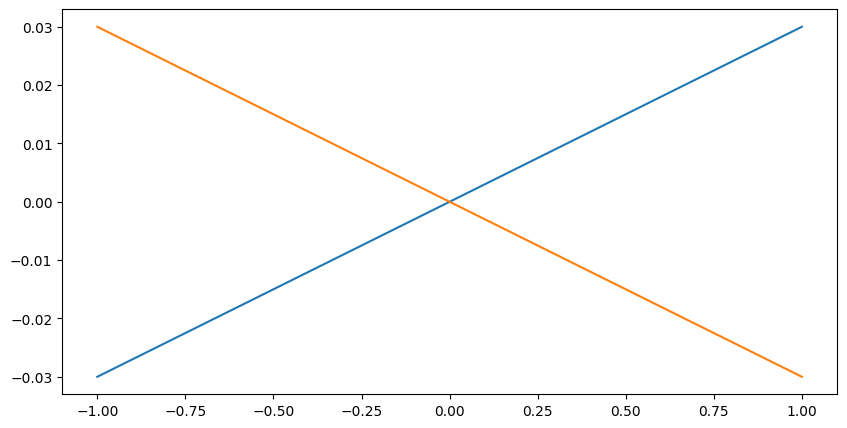

In [7]:
B0 = np.full(n, 0.0)
G_x = 0.03
DB = B_gradient(spins_x, G_x, 'linear')
DB_ = B_gradient(spins_x, -G_x, 'linear')

B = B0 + DB
B_ = B0 + DB_

plt.figure(figsize = (10, 5))
plt.plot(np.sort(spins_x), np.sort(B))
plt.plot(np.sort(spins_x), np.sort(B_)[::-1])

gamma = 10.0


For the gradient inversion to work, the additional phase that must be applied to the process for it to continue the movement from the same point where it stopped before the inversion must be $+2 \theta$:

![Gradient inverse phase](gradient_inverse__phase.jpeg)

In [8]:
ws = generate_ws(B0, spins_x, G_x, gamma, "linear")
pop1 = population(ws, T2s, np.ones_like(ws), phis)
S, t, phis_2 = population_transverse_decay(t0, tn, dt, pop1, echos, return_phase = True)

ws = generate_ws(B0, spins_x, -G_x, gamma, "linear")
pop2 = population(ws, T2s, np.ones_like(ws), phis_2)
S_, t_ = population_transverse_decay(tn, 800.0, dt, pop2, echos)

c:\Users\Lampada\anaconda3\envs\mestrado\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Lampada\anaconda3\envs\mestrado\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


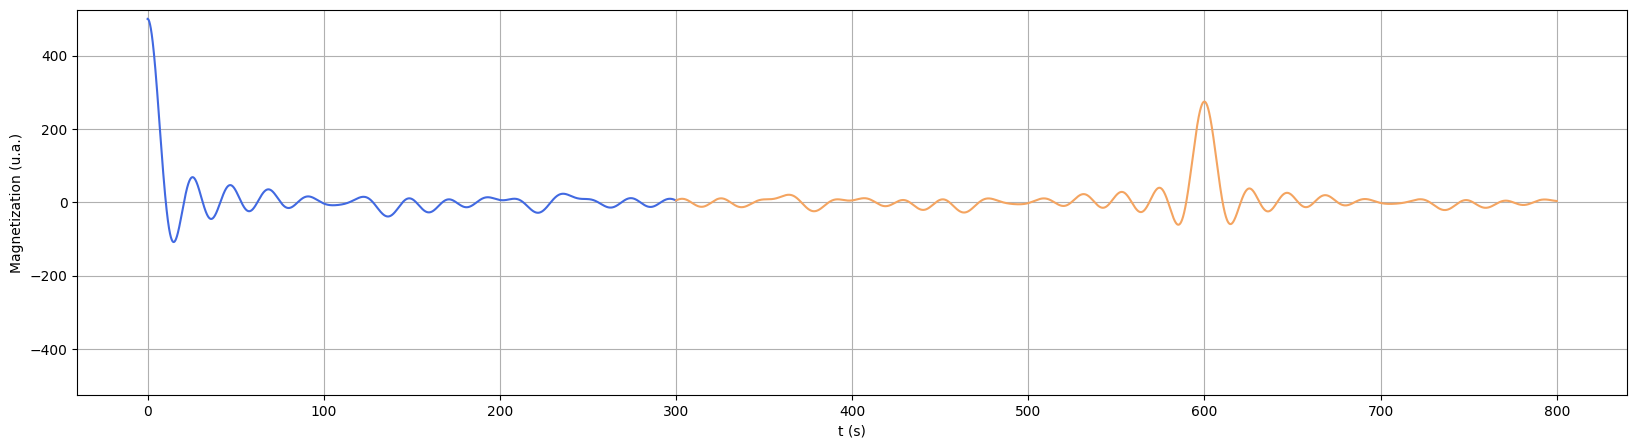

In [9]:

plt.figure(figsize=(20, 5))
plt.plot(t, S, c = "royalblue")
plt.plot(t_, S_, c = "sandybrown")
plt.ylim(-n - 0.05*n, n + 0.05*n)
plt.xlabel("t (s)")
plt.ylabel("Magnetization (u.a.)")
plt.grid()